In [1]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
src = cv2.imread('./lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print("Image load failed!")
    sys.exit()

# 밝게
dst = cv2.add(src, 100)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
src = cv2.imread('./lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print("Image load failed!")
    sys.exit()
    
# 어둡게
#dst = cv2.add(src, -100)
#dst2 = src + 100
cv2.imshow('src', src)
cv2.imshow('dst', dst)
#cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
src = cv2.imread('./lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print("Image load failed!")
    sys.exit()
    
# 어둡게
#dst = cv2.add(src, -100)
dst = np.clip(src + 100., 0, 255).astype(np.uint8) # numpy 이용해 수정
#dst2 = src + 100
cv2.imshow('src', src)
cv2.imshow('dst', dst)
#cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
src = cv2.imread('./lenna.bmp', cv2.IMREAD_COLOR)
if src is None:
    print("Image load failed!")
    sys.exit()
    
# 어둡게
dst = cv2.add(src, (100, 100, 100, 0)) # bgr 순으로 추가 해줘야함
#dst = cv2.add(src, 100) # 파란색만 100 상승
#dst = np.clip(src + 100., 0, 255).astype(np.uint8) # numpy 이용해 수정
#dst2 = src + 100
cv2.imshow('src', src)
cv2.imshow('dst', dst)
#cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./lenna.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./cat.bmp', cv2.IMREAD_GRAYSCALE)

if src is None or src2 is None:
    print("Image load failed!")
    sys.exit()
    
# 어둡게
#dst = cv2.add(src, -100)
dst = np.clip(src + 100., 0, 255).astype(np.uint8) # numpy 이용해 수정
#dst2 = src + 100
cv2.imshow('src', src)
cv2.imshow('dst', dst)
#cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
src1 = cv2.imread('./image/Lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./image/square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 흰색 : 255기때문에 가려짐, 검정색은 0이라 원본영향 X    
dst1 = cv2.add(src1, src2, dtype = cv2.CV_8U)
# O.5 -> 알파,베타 가중치 (0.5는 절반씩)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
# 흰색 255기 때문에 빼면 검정됨, 검정은 0이라 원본영향 X
dst3 = cv2.subtract(src1,src2)
# 흰색부분만 영향 가기 때문에 빼고나서 절댓값 처리
dst4 = cv2.absdiff(src1, src2)

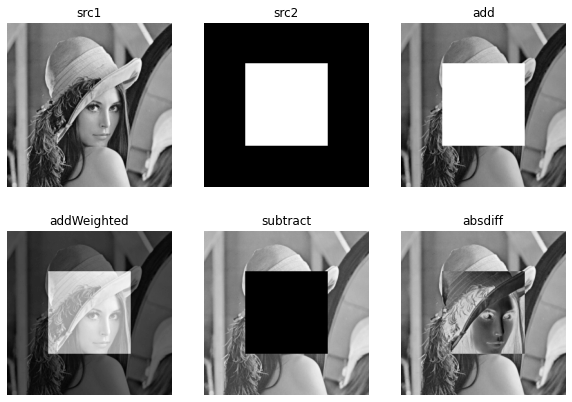

In [25]:
plt.figure(figsize=(10,7))
plt.subplot(231), plt.axis('off'), plt.imshow(src1,'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2,'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1,'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2,'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3,'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4,'gray'), plt.title('absdiff')
plt.show()

In [3]:
src = cv2.imread('./image/candies.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()
    
print('src.shape', src.shape)
print('src.dtype', src.dtype)

b_plane, g_plane, r_plane = cv2.split(src)

cv2.imshow('src', src)
# 각 색이 진한부분이 밝게나옴 -> b_plane은 파란색이 흰색으로 표현
cv2.imshow('B_plane', b_plane)
cv2.imshow('G_plane', g_plane)
cv2.imshow('R_plane', r_plane)
cv2.waitKey()

cv2.destroyAllWindows()

src.shape (480, 640, 3)
src.dtype uint8


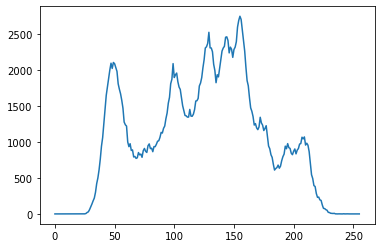

In [5]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
hist = cv2.calcHist([src], [0], None, [256], [0,256])

cv2.imshow('src', src)
cv2.waitKey(1)
cv2.destroyAllWindows()

plt.plot(hist)
plt.show()

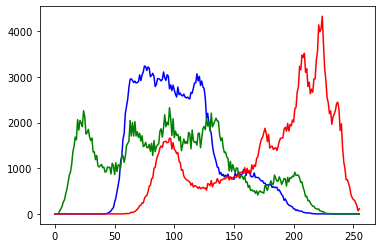

In [8]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()
    
colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0,256])
    plt.plot(hist, color=c)

cv2.imshow('src', src)
cv2.waitKey(1)

plt.show()

cv2.destroyAllWindows()

In [10]:
def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)
    
    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x,0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
        
    return imgHist

src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
hist = cv2.calcHist([src], [0], None, [256], [0,256])
histImg = getGrayHistImage(hist)
    
cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()